In [236]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [237]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [239]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [240]:
model.score(X_train, y_train)

1.0

In [241]:
model.score(X_test, y_test)

0.7785087719298246

In [242]:
from sklearn.model_selection import GridSearchCV
grid={ 'criterion':['gini'],  # 'entropy'
    'splitter':['random'],   # 'best'
    'max_depth':[7],   # 4,5,6,8,9,10
    'min_samples_split':[2],   # 3,4,5,10
    'min_samples_leaf':[7],   # 4,5,6,8,9,10,11,12,13
    'max_features':[6]  # 5,7,8
    }   
model = DecisionTreeClassifier(random_state=1)

In [243]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [244]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [7],
                         'max_features': [6], 'min_samples_leaf': [7],
                         'min_samples_split': [2], 'splitter': ['random']},
             scoring='f1')

In [245]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'} 

DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_leaf=7,
                       random_state=1, splitter='random')


In [246]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [247]:
model.score(X_train, y_train)

0.8407163053722903

In [248]:
model.score(X_test, y_test)

0.8377192982456141

In [249]:
cart1 = DecisionTreeClassifier(random_state=1)
cart2 = grid_search.best_estimator_

In [250]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=cart1,random_state=1)
model=clf.fit(X_train,y_train)

In [251]:
model.score(X_train, y_train)

0.9839773798303487

In [252]:
model.score(X_test, y_test)

0.8421052631578947

In [253]:
clf = BaggingClassifier(base_estimator=cart2,random_state=1)
model=clf.fit(X_train,y_train)

In [254]:
model.score(X_train, y_train)

0.8548539114043355

In [255]:
model.score(X_test, y_test)

0.8618421052631579

In [256]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.3],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=cart1,random_state=1)

In [257]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [258]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.3],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [259]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_samples=0.3, n_estimators=200, n_jobs=-1, random_state=1)


In [260]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [261]:
model.score(X_train, y_train)

0.9123468426013195

In [262]:
model.score(X_test, y_test)

0.8486842105263158

In [263]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.8],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=cart2,random_state=1)

In [264]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [265]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                                               max_features=6,
                                                                               min_samples_leaf=7,
                                                                               random_state=1,
                                                                               splitter='random'),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.8],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [266]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        max_features=6,
                                                        min_samples_leaf=7,
                                                        random_state=1,
                                                        splitter='random'),
                  max_samples=0.8, n_estimators=200, n_jobs=-1, random_state=1)


In [267]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [268]:
model.score(X_train, y_train)

0.8548539114043355

In [269]:
model.score(X_test, y_test)

0.8574561403508771

In [270]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [271]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [272]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8525033829499323

In [273]:
model.score(X_test, y_test)

0.8399122807017544

In [274]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [275]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8482563619227145

In [276]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8267543859649122

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [278]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [279]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

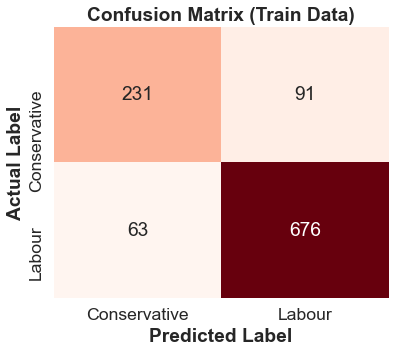

In [280]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

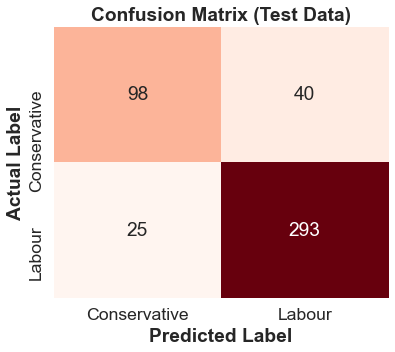

In [281]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [282]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.79      0.72      0.75       322
      Labour       0.88      0.91      0.90       739

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 



In [283]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.80      0.71      0.75       138
      Labour       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.85      0.86      0.86       456
 



AUC: 0.920


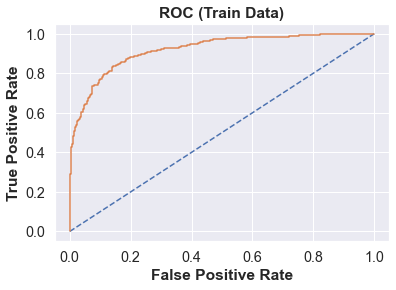

In [284]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.914


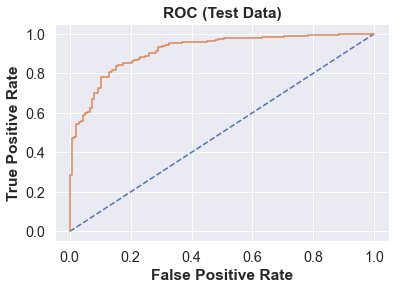

In [287]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [289]:
from sklearn.ensemble import RandomForestClassifier
grid={'n_estimators':[100],   # 50,150,200,300,500
    'criterion':['gini'],   # 'entropy'
    'max_depth':[5],   # 6,7,8,9
    'min_samples_split':[2],  #5,10,20
    'min_samples_leaf':[1],   #3,5,7,10
    'max_features':[2],   # 3,4,5,6
    'bootstrap':[True],  # False
    'oob_score':[False],  # True
    'warm_start':[False],  # True
    'ccp_alpha':[0.0,]   # 0.2,0.4
}
model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

grid_search.fit(X_train, y_train)

clf = grid_search.best_estimator_
rf=clf.fit(X_train,y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


In [290]:
grid={ 'n_estimators':[200],   # 10,20,50,5,6,7,8,9,30,100,400,500,250,300,350,100,150
    'max_samples':[0.4],    # 1.0,0.7,0.5
    'max_features':[1.0],   # 0.5,0.7,0.3
    'bootstrap':[True],   # False
    'bootstrap_features':[False],   # True
    'oob_score':[False],   # True
    'warm_start':[False],   # True
    'n_jobs':[-1],
    'verbose':[0]}   # 1
model = BaggingClassifier(base_estimator=rf,random_state=1)

In [291]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='accuracy')

In [292]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                               max_features=2,
                                                                               random_state=1),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'bootstrap_features': [False],
                         'max_features': [1.0], 'max_samples': [0.4],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'oob_score': [False], 'verbose': [0],
                         'warm_start': [False]},
             scoring='accuracy')

In [293]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.4, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'verbose': 0, 'warm_start': False} 

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        max_features=2,
                                                        random_state=1),
                  max_samples=0.4, n_estimators=200, n_jobs=-1, random_state=1)


In [294]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [295]:
model.score(X_train, y_train)

0.8520263901979265

In [296]:
model.score(X_test, y_test)

0.8530701754385965

In [297]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [298]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [299]:
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8538565629228687

In [300]:
model.score(X_test, y_test)

0.8399122807017544

In [301]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 93)

In [302]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8557964184731386

In [303]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


0.8333333333333334

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [305]:
clf = grid_search.best_estimator_
model=clf.fit(X_train,y_train)

In [306]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

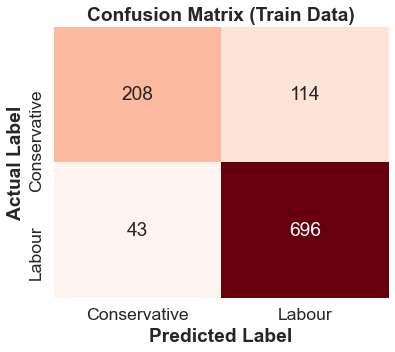

In [307]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

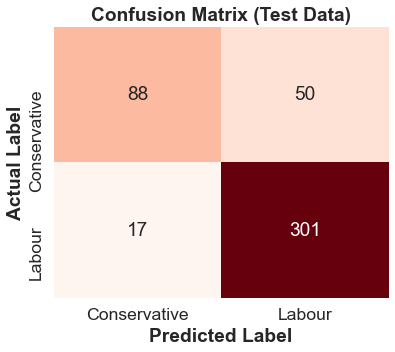

In [308]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [309]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.83      0.65      0.73       322
      Labour       0.86      0.94      0.90       739

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061
 



In [310]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.84      0.64      0.72       138
      Labour       0.86      0.95      0.90       318

    accuracy                           0.85       456
   macro avg       0.85      0.79      0.81       456
weighted avg       0.85      0.85      0.85       456
 



AUC: 0.918


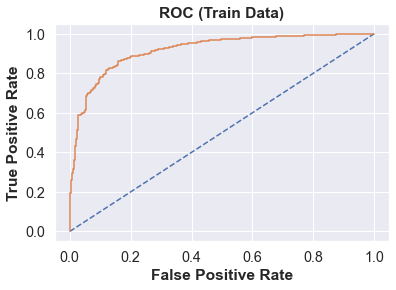

In [311]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.921


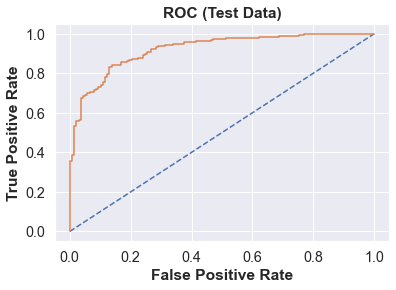

In [312]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)